<a href="https://colab.research.google.com/github/Jacob-Thomas-I21/ML-ASSIGNMENTS/blob/main/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
# Load the dataset
file_path = "/content/Employee.csv"
df = pd.read_csv(file_path)

# **Question 1**

In [3]:
print("Initial Dataset Info:")
df.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [5]:
print("\nThe number of null values coloumn wise is:","\n",df.isnull().sum())


The number of null values coloumn wise is: 
 Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [6]:
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [7]:
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [8]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# **Question 2**


Column: age
Mean: 32.19
Median: 33.00
Mode: 33.00
Skewness: 0.23
Kurtosis: -0.62


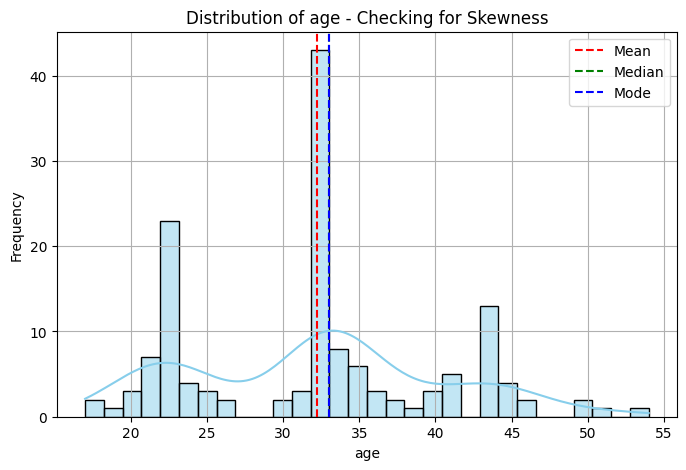


Column: salary
Mean: 5238.19
Median: 5000.00
Mode: 5000.00
Skewness: 0.26
Kurtosis: -0.92


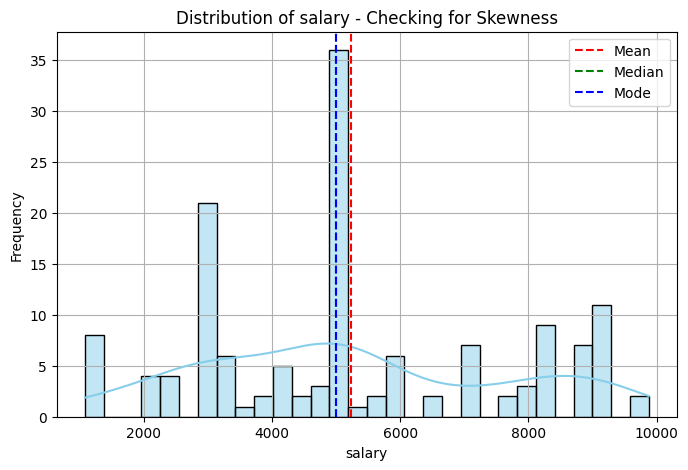

In [26]:
from scipy.stats import skew, kurtosis

# Select numerical columns for analysis
num_cols = ['age', 'salary']

# Analyze each column
for col in num_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]:.2f}")
    print(f"Skewness: {skew(df[col]):.2f}")
    print(f"Kurtosis: {kurtosis(df[col]):.2f}")

    # Visualizing Distribution to Determine Best Imputation Method
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', label='Median')
    plt.axvline(df[col].mode()[0], color='blue', linestyle='dashed', label='Mode')
    plt.legend()
    plt.title(f"Distribution of {col} - Checking for Skewness")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()



In [27]:
df['age'] = df['age'].replace(0, np.nan)



In [31]:
df = df.assign(
    age=df['age'].fillna(df['age'].mean()),  # Use Mean for Age
    salary=df['salary'].fillna(df['salary'].median()),  # Use Median for Salary (outliers present)
    company=df['company'].fillna(df['company'].mode()[0]),  # Use Mode for categorical
    place=df['place'].fillna(df['place'].mode()[0])  # Use Mode for categorical
)


In [32]:
df.drop_duplicates(inplace=True)

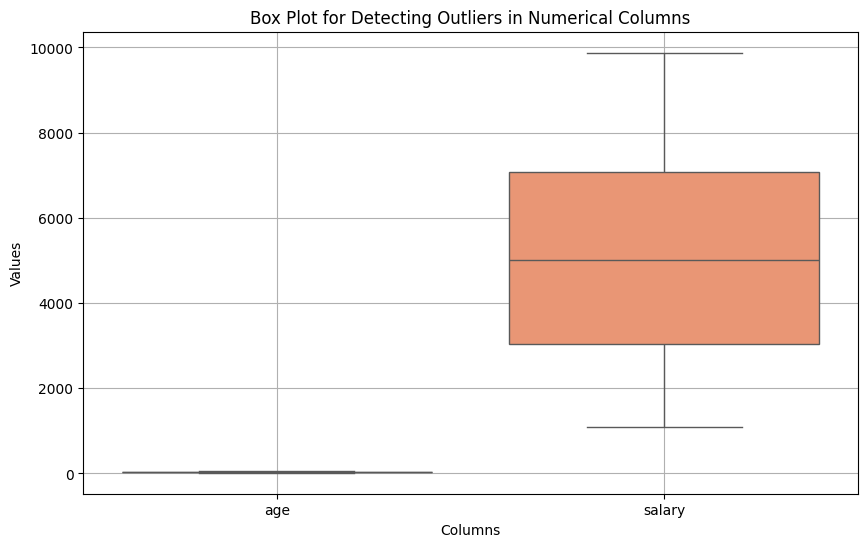

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for boxplot visualization
numerical_columns = ['age', 'salary']

# Create a box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], palette="Set2")
plt.title("Box Plot for Detecting Outliers in Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [34]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df





In [35]:
df = remove_outliers_iqr(df, 'salary')

# **Question 3**

In [14]:
# Filtering Data
df_filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered Data (Age > 40 and Salary < 5000):")
print(df_filtered)




Filtered Data (Age > 40 and Salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


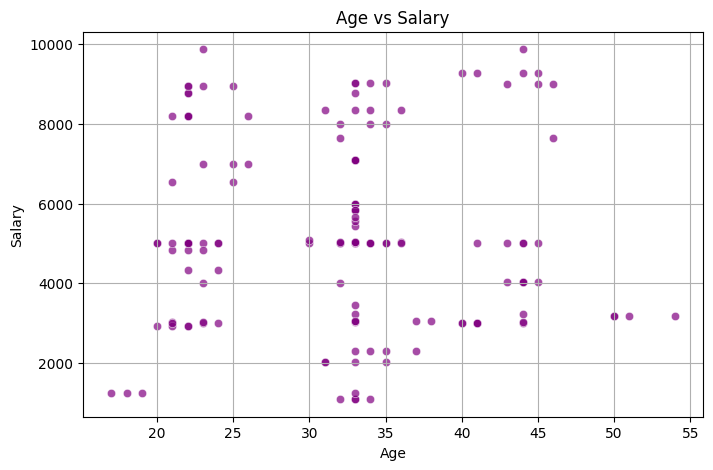

In [15]:
# Plot Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['salary'], color="purple", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.grid(True)
plt.show()


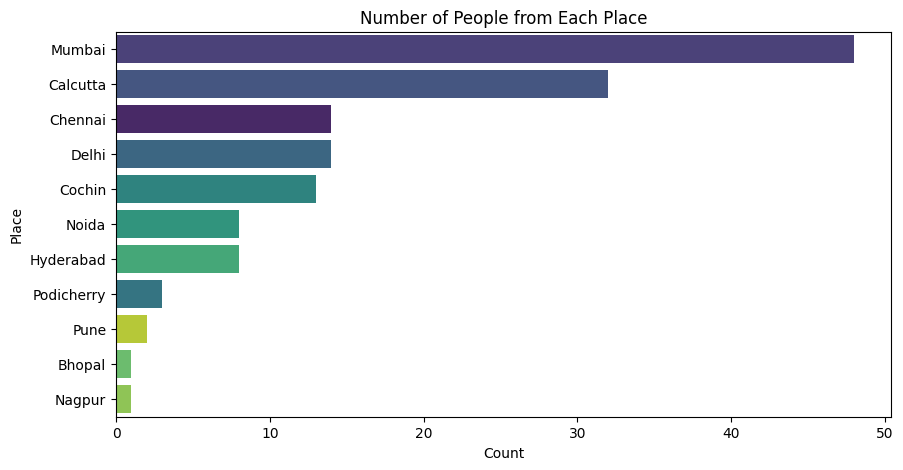

In [36]:
# Count number of people from each place and visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot with corrected syntax
plt.figure(figsize=(10, 5))
sns.countplot(y=df['place'], order=df['place'].value_counts().index, hue=df['place'], palette="viridis", legend=False)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People from Each Place")
plt.show()


# **Question 4**

In [17]:
categorical_cols = ['company', 'place', 'country']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# **Question 5**

In [18]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [19]:
numeric_cols = ['age', 'salary']
df_standard_scaled = scaler_standard.fit_transform(df_encoded[numeric_cols])
df_minmax_scaled = scaler_minmax.fit_transform(df_encoded[numeric_cols])

In [20]:
# Convert to DataFrame
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=[f"{col}_standard" for col in numeric_cols])
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=[f"{col}_minmax" for col in numeric_cols])


In [21]:
# Concatenate with original dataframe
df_final = pd.concat([df_encoded, df_standard_scaled, df_minmax_scaled], axis=1)

In [23]:
# Display final processed dataset
print("\nFinal Processed Dataset:")
print(df_final.head())

# Save the cleaned dataset
df_final.to_csv("/content/Processed_Employee.csv", index=False)
print("\nProcessed dataset saved as 'Processed_Employee.csv' ✅")


Final Processed Dataset:
    age  salary  gender company_Congnizant company_Infosys  \
0  20.0  5000.0     0.0              False           False   
1  30.0  5000.0     0.0              False            True   
2  35.0  2300.0     0.0              False           False   
3  40.0  3000.0     0.0              False            True   
4  23.0  4000.0     0.0              False           False   

  company_Infosys Pvt Lmt company_TCS company_Tata Consultancy Services  \
0                   False        True                             False   
1                   False       False                             False   
2                   False        True                             False   
3                   False       False                             False   
4                   False        True                             False   

  place_Calcutta place_Chennai  ... place_Hyderabad place_Mumbai place_Nagpur  \
0          False          True  ...           False        False     